In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Constraints

"""
Constraints
x[2] <= 3.2
x[2] >= 6.4
x[1]**2 + x[2]**2 >=1
x[1] - x[2] != 0
"""





'\nConstraints\nx[2] <= 3.2\nx[2] >= 6.4\nx[1]**2 + x[2]**2 >=1\nx[1] - x[2] != 0\n'

In [3]:
def fobj(X_Swarm): ## this is the sphere function
    
    
    
    ### List of constraints
    Constraint1 = (X_Swarm[1] <= 3.2)*(X_Swarm[1] >= 6.4)
    Constraint2 = (X_Swarm[0]**2 + X_Swarm[1]**2 >=1)
    Constraint3 = (X_Swarm[0]  != X_Swarm[1])
    
    if Constraint1*Constraint2*Constraint3 == 1:
        result = np.sum(X_Swarm**2)
        
    if Constraint1*Constraint2*Constraint3 == 0:
        result = np.sum(X_Swarm**2) + 200  
        
    return result


## 
Number_Of_Variables = 2 # they called this nVar
Upper_Bounds = 7*np.ones(Number_Of_Variables) ## they called thus up
Lower_Bounds = 0*np.ones(Number_Of_Variables) ## they called it lb




### Defining the hyperparameters

Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter

# Weight_Of_Inertia = 1 ## This is the hyperparameter "w"
W_Max = 0.9 ## this is the Initial weight of the inertia
W_Min = 0.2 ## this is the final weight of the inertia
c1 = 2 ## This is the individual weight (best found location so far)
c2 = 2 ## this is the social weight (best found location from team)
vMax = (Upper_Bounds - Lower_Bounds)*0.2
vMin = -vMax




In [4]:
## initializing the Swarm object


class Particles(object):
    def __init__(self, Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST):
        self.V = np.zeros((Number_Of_Particles,Number_Of_Variables))
        self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
        self.O = 10**30*np.ones(Number_Of_Particles)
        for k in range (0,Number_Of_Particles):
            self.X[k,:] = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds

        
        self.PBEST = PBEST(Number_Of_Variables,Number_Of_Particles)
            
class PBEST(object):
    
    def __init__(self,Number_Of_Variables,Number_Of_Particles):
#             self.X[k,:] = np.zeros(Number_Of_Variables)
            self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.O = 10**30*np.ones(Number_Of_Particles)
            
            
            
class GBEST(object):
    
    def __init__(self,Number_Of_Variables,Number_Of_Particles):
#             self.X[k,:] = np.zeros(Number_Of_Variables)
            self.X = np.zeros(Number_Of_Variables)
            self.O = 10**30
            

class Swarm(object):
    
    def __init__(self,Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles):
        self.Particles = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)
        self.GBEST = GBEST(Number_Of_Variables,Number_Of_Particles)
    
    

Particles1 = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)

Swarm1 = Swarm(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles)
print(Swarm1.Particles.PBEST.O)

[1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30
 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30
 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30]


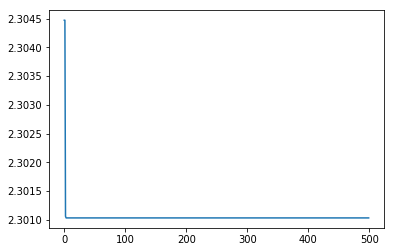

In [5]:
## Mail loop
Swarm1 = Swarm(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles)

X_Optimal = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds


# print(Swarm1.Particles.PBEST.O)
Cost_Vector = np.zeros(Number_Of_Iterations)
for t in range(0,Number_Of_Iterations):
    
    ## this is to get the 
    for k in range(0,Number_Of_Particles):
        
        ## Calculate the curent Objective
        Swarm1.Particles.O[k] = fobj(Swarm1.Particles.X[k,:]) 
        
        ##  update PBEST
        if Swarm1.Particles.O[k] < Swarm1.Particles.PBEST.O[k]:
            Swarm1.Particles.PBEST.O[k] = Swarm1.Particles.O[k]
            Swarm1.Particles.PBEST.X[k,:] = Swarm1.Particles.X[k,:]          
        
        ## Update GBEST
        if Swarm1.Particles.O[k] < Swarm1.GBEST.O:
            Swarm1.GBEST.O = Swarm1.Particles.O[k]   
            Swarm1.GBEST.X[:] = Swarm1.Particles.X[k,:]  

    #### Update the X and V vectors
    w = W_Max - t*(W_Max - W_Min)/Number_Of_Iterations
    
    for k in range(0,Number_Of_Particles):
        Swarm1.Particles.V[k,:] = w*Swarm1.Particles.V[k,:]\
                                + c1*np.random.rand(Number_Of_Variables)*(Swarm1.Particles.PBEST.X[k,:] - Swarm1.Particles.X[k,:] )\
                                + c2*np.random.rand(Number_Of_Variables)*(Swarm1.GBEST.X- Swarm1.Particles.X[k,:] )


        
        
        ## Velocity Checking and limitation
        index1 = np.nonzero(Swarm1.Particles.V[k,:] > vMax)
        index2 = np.nonzero(Swarm1.Particles.V[k,:] < vMin)

        if Swarm1.Particles.V[k,index1].shape[1] >= 1:
            Swarm1.Particles.V[k,index1] = vMax[index1]

        if Swarm1.Particles.V[k,index2].shape[1] >= 1:
            Swarm1.Particles.V[k,index2] = vMin[index2]

            
            
            
            
        ## Updating position
        Swarm1.Particles.X[k,:] = Swarm1.Particles.X[k,:] + Swarm1.Particles.V[k,:]
            
        ## Position Checking and limitation
        index1 = np.nonzero(Swarm1.Particles.X[k,:] > Upper_Bounds[0])
        index2 = np.nonzero(Swarm1.Particles.X[k,:] < Lower_Bounds[0])

   
        if Swarm1.Particles.X[k,index1].shape[1] >= 1:
            Swarm1.Particles.X[k,index1] = Upper_Bounds[index1]

        if Swarm1.Particles.X[k,index2].shape[1] >= 1:
            Swarm1.Particles.X[k,index2] = Lower_Bounds[index2]
         
            
            

        
#     print(np.max(Swarm1.Particles.V))
    Cost_Vector[t] =    Swarm1.GBEST.O

    
    
plt.plot(np.log10(Cost_Vector))
# print(Cost_Vector)

In [ ]:


### Visualizing the landscape

## meshgrid
## 